<a href="https://colab.research.google.com/github/fernanda0402/Doutorado/blob/main/An%C3%A1lise_e_teste_GP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Bibliotecas

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumtrapz

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()
!mamba install pyccl

In [3]:
import pyccl as ccl

In [ ]:
!pip install git+https://github.com/JCGoran/GaPP@feature/python3#GaPP
from gapp import gp
from numpy import loadtxt, savetxt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

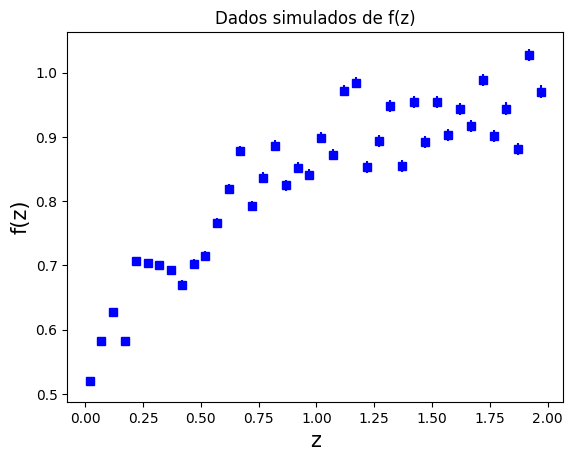

In [14]:
cosmo = ccl.Cosmology(
    Omega_c=0.2656, Omega_b=0.0494, h=0.6727, sigma8=0.8120, n_s=0.9649,
    matter_power_spectrum='linear')


z = np.arange(0.02, 2, 0.05)

a = 1. / (1. + z)

# fz mocks

fz = ccl.growth_rate(cosmo, a)

efz = 0.01 * fz


fz = np.random.normal(fz, 0.04)

# plote

plt.xlabel('z', fontsize=15)
plt.ylabel('f(z)', fontsize=15)
plt.title('Dados simulados de f(z)')
plt.errorbar(z, fz, efz, fmt='s', color='blue')
plt.show()


# salvando os dados

Nfz = z, fz, efz
np.savetxt('fz_mocks.dat', np.transpose(Nfz), delimiter='\t')

In [18]:
# baixando os dados
data = np.genfromtxt('/content/drive/MyDrive/Doutorado/Dados/Mocks/fz_mocks(1).dat', delimiter=', ')

z_gapp = data[0]

f_gapp = data[1]

sig_f = data[2]

# nomeando
x_gapp = z_gapp
y_gapp = f_gapp
e = sig_f

# xmin, xmax and nstar are interpreted as two-dimensional vectors
xmin = 0
xmax = 1.4
nstar = 1000

# initial values of the hyperparameters of the squared-exponential covariance function
initheta = [2.0, 2.0]

# initialization of the Gaussian Process
g = gp.GaussianProcess(x_gapp, y_gapp, e, cXstar=(xmin, xmax, nstar))

# training of the hyperparameters and reconstruction of the function
(rec, theta) = g.gp(theta=initheta)

xi = rec[:, 0]

y_pred = rec[:, 1]
sigma  = rec[:, 2]

y_pred_95_less = y_pred - 1.9600*sigma
y_pred_95_plus = y_pred + 1.9600*sigma

# Plot the function, the prediction and the 95% confidence interval
plt.figure()
plt.tick_params(labelsize=14, color='purple')
plt.errorbar(x_gapp, y_gapp, e, fmt='r.', color='purple', markersize=10, label='Dados')
plt.plot(xi, y_pred, color = 'green', label='Prediction', linestyle="--")
plt.fill(np.concatenate([xi, xi[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, color = 'lightgreen', ec='None', label=r'$95\%$ confidence interval')

# legenda, label e título
plt.xlabel('z', fontsize=15)
plt.ylabel('f(z)', fontsize=15)
plt.legend(loc='best')
plt.title('Reconstruindo f(z)')
plt.show()


TypeError: ignored

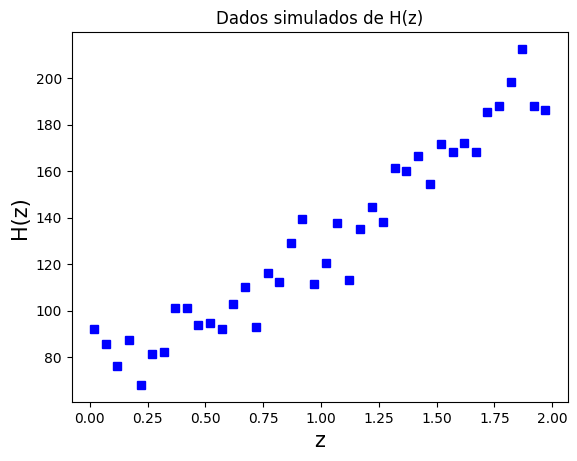

In [20]:
cosmo = ccl.Cosmology(
    Omega_c=0.2656, Omega_b=0.0494, h=0.6727, sigma8=0.8120, n_s=0.9649,
    matter_power_spectrum='linear')


z = np.arange(0.02, 2, 0.05)

a = 1. / (1. + z)

# hz mocks
H0 = 70

Hz = H0 * ccl.background.h_over_h0(cosmo, a)

ehz = 0.01 * Hz


Hz = np.random.normal(Hz, 10)

# plote

plt.xlabel('z', fontsize=15)
plt.ylabel('H(z)', fontsize=15)
plt.title('Dados simulados de H(z)')
plt.errorbar(z, Hz, efz, fmt='s', color='blue')
plt.show()


# salvando os dados

NHz = z, Hz, ehz
np.savetxt('Hz_mocks.dat', np.transpose(NHz), delimiter='\t')